## KNN Approach



### Setup

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


In [11]:
# read dynamic path
base_dir = Path(os.getcwd()).parents[3]
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [12]:
nn_data_raw = pd.read_csv(data_dir/"COX1/COX1.csv")

nn_data_raw

,INDEX,NAME,Hydrogen_Bond:ALA527A,Halogen_Bond:ASP110A,Hydrophobic_Interaction:ILE345A,Hydrophobic_Interaction:TYR466A,Hydrogen_Bond:GLU520A,Hydrogen_Bond:VAL116A,Pi-Stacking:PHE205A,Hydrophobic_Interaction:LEU115A,...,Hydrophobic_Interaction:PRO86A,Hydrogen_Bond:TYR348A,Halogen_Bond:TYR355A,Hydrophobic_Interaction:PHE201A,Hydrophobic_Interaction:PRO363A,Hydrogen_Bond:GLN351A,Hydrogen_Bond:SER353A,Water_Bridge:PRO86A,Halogen_Bond:LEU112A,LABEL
0,1,CHEMBL314337|COX1_actives_final_part2|sdf|163,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,active
1,2,CHEMBL305971|COX1_actives_final_part2|sdf|13,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,active
2,3,ZINC00705195|decoys_final|sdf|51,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
3,4,ZINC17088576|decoys_final|sdf|59,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
4,5,ZINC06204226|decoys_final|sdf|97,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1034,ZINC53927572|decoys_final|sdf|36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1034,1035,ZINC48571703|decoys_final|sdf|388,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
1035,1036,ZINC50122389|decoys_final_part3|sdf|257,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1036,1037,ZINC60280739|decoys_final_part3|sdf|282,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [13]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 209       
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/80


37/37 - 2s - loss: 0.6885 - accuracy: 0.5276 - val_loss: 0.6538 - val_accuracy: 0.6644 - 2s/epoch - 60ms/step
Epoch 2/80
37/37 - 1s - loss: 0.6450 - accuracy: 0.6638 - val_loss: 0.6259 - val_accuracy: 0.6986 - 501ms/epoch - 14ms/step
Epoch 3/80
37/37 - 0s - loss: 0.6230 - accuracy: 0.6983 - val_loss: 0.6093 - val_accuracy: 0.7192 - 449ms/epoch - 12ms/step
Epoch 4/80
37/37 - 0s - loss: 0.6098 - accuracy: 0.7069 - val_loss: 0.6023 - val_accuracy: 0.7260 - 475ms/epoch - 13ms/step
Epoch 5/80
37/37 - 1s - loss: 0.6018 - accuracy: 0.7155 - val_loss: 0.5967 - val_accuracy: 0.7260 - 503ms/epoch - 14ms/step
Epoch 6/80
37/37 - 0s - loss: 0.5954 - accuracy: 0.7207 - val_loss: 0.5939 - val_accuracy: 0.7260 - 422ms/epoch - 11ms/step
Epoch 7/80
37/37 - 0s - loss: 0.5900 - accuracy: 0.7207 - val_loss: 0.5914 - val_accuracy: 0.7192 - 385ms/epoch - 10ms/step
Epoch 8/80
37/37 - 0s - loss: 0.5848 - accuracy: 0.7224 - val_loss: 0.5888 - val_accuracy: 0.7192 - 433ms/epoch - 12ms/step
Epoch 9/80
37/37 - 0s 

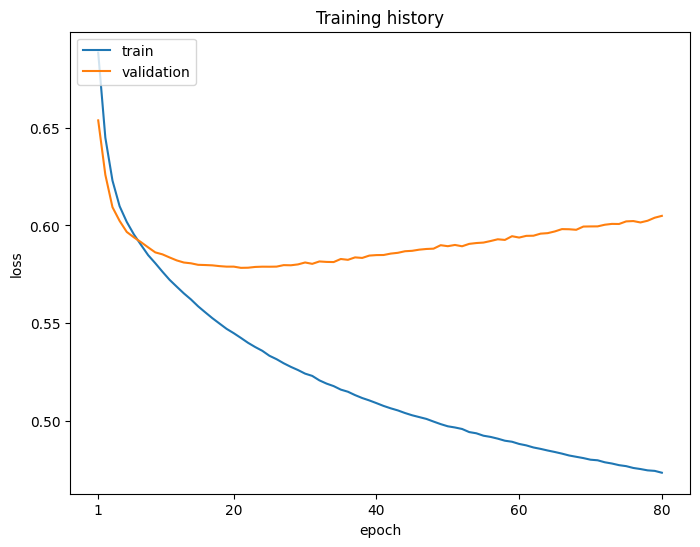

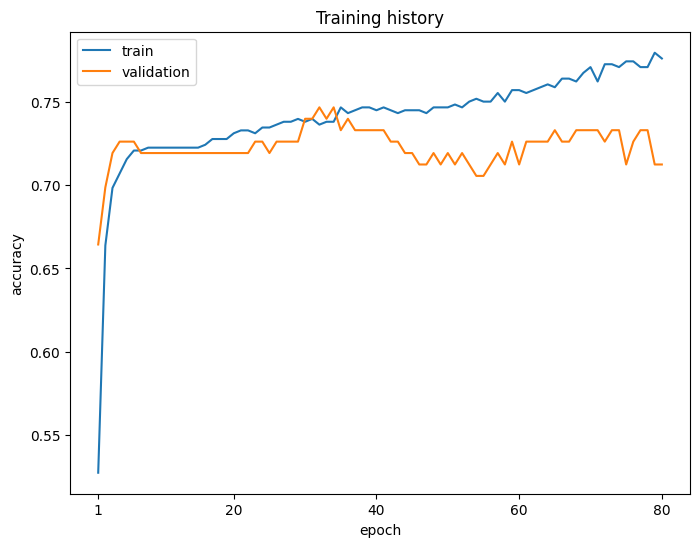

In [16]:
history = model.fit(x=X_train, y=y_train, epochs=80, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [17]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


10/10 [==============================] - 0s 5ms/step


### Prepare Data for evaluation

In [18]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])
result_df = result_df.drop(columns="NAME")

for i, row in enumerate(X_test):
    data = [i]
    data.extend(row)
    result_df.loc[len(result_df["INDEX"])] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "COX1/baseline_nn.csv", encoding="utf-8")